In [39]:
# This workbook assumes that cells have been detected 

import numpy as np

data = np.load('ilastik_out.npy')
data = data.tolist()

In [40]:
vesselprobs = data['vesselprobs']
cellprobs = data['cellprobs']

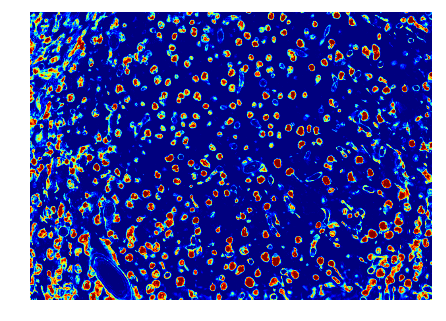

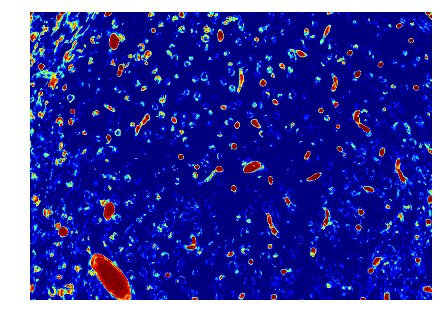

(1012, 728, 300)

In [44]:
# check to make sure that things were read in correctly

%matplotlib inline
import ndparse as ndp

ndp.plot(cellprobs, slice = 50, cmap1='jet')
ndp.plot(vesselprobs, slice = 50, cmap1='jet')

np.shape(cellprobs)

In [45]:
import ndio.remote.neurodata as neurodata
nd = neurodata()

token = 'dyer16'



A newer version of ndio is available. 'pip install -U ndio' to update. Pass 'suppress_warnings=True' to the neurodata constructor to suppress this message.


In [57]:
nd.create_channel(token,'cellprob',neurodata.IMAGE,'float32',0)
nd.create_channel(token,'vesselprob',neurodata.IMAGE,'float32',0)

True

In [58]:
pad = 20 #carried forward from previous analysis

cellprob_crop = cellprobs[pad:np.shape(cellprobs)[0]-pad,pad:np.shape(cellprobs)[1]-pad,pad:np.shape(cellprobs)[2]-pad]
vesselprob_crop = vesselprobs[pad:np.shape(vesselprobs)[0]-pad,pad:np.shape(vesselprobs)[1]-pad,pad:np.shape(vesselprobs)[2]-pad]

In [59]:
# fairly large - may take a few minutes
nd.post_cutout(token, 'cellprob', 20, 20, 20, cellprob_crop, resolution = 0)

True

In [60]:
# fairly large - may take a few minutes
nd.post_cutout(token, 'vesselprob', 20, 20, 20, vesselprob_crop, resolution = 0)

True

In [62]:
import matlab.engine
eng = matlab.engine.start_matlab()
tf = eng.isprime(37)
print tf # matlab is working

True


In [ ]:
# now just need to add the xbrain stuff at the end - feel free to integrate or I will as Monday continues...